In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assuming the dataset is in a CSV file named 'gold_prices.csv'
data = pd.read_csv('C:/Users/Rebel/Desktop/DS/I S/Mentorness/MACHINE LEARNING/Project 1 Gold price prediction/goldstock.csv')
data

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...,...
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [3]:
data.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [5]:
data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [6]:
# Check for missing values
data.isnull().sum()

# Handle missing values if any
data = data.dropna()  # Drop rows with missing values, or use imputation techniques

In [7]:
# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

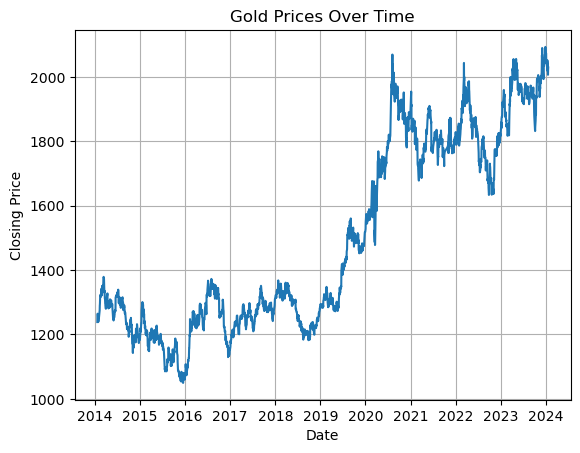

In [11]:
# Visualize basic trends
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Close'])
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [9]:
## Visualize Time Series

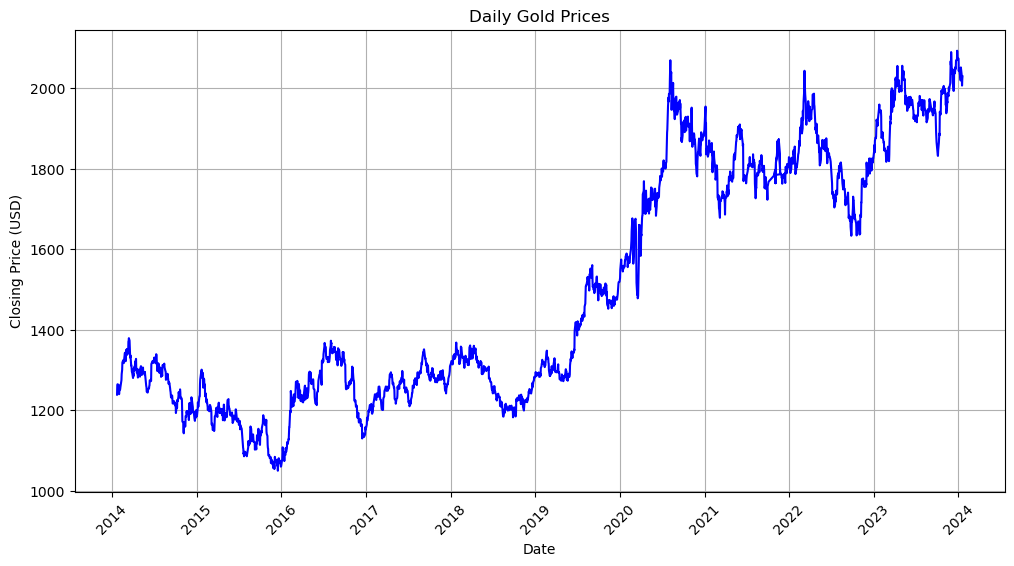

In [10]:
# Time series plot of Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Daily Gold Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

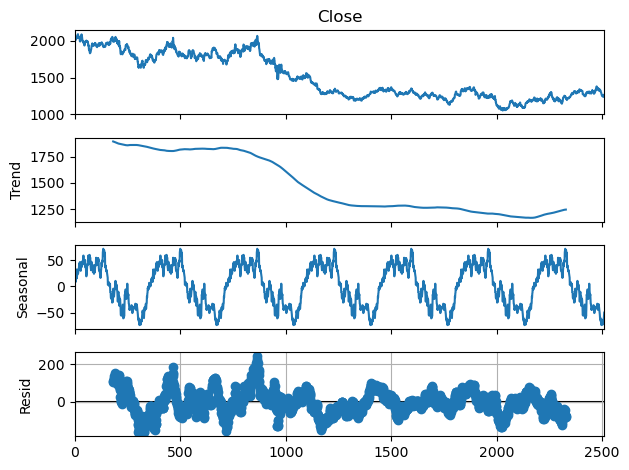

In [13]:
# Decomposition visualization
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=365)
result.plot()
plt.grid(True)
plt.show()

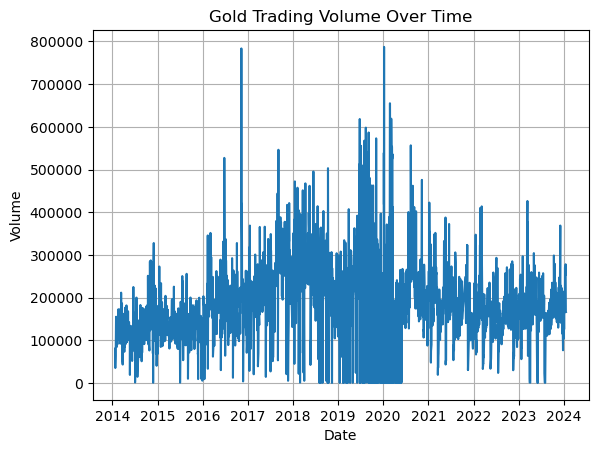

In [14]:
# Other feature visualizations
plt.plot(data['Date'], data['Volume'])
plt.title('Gold Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

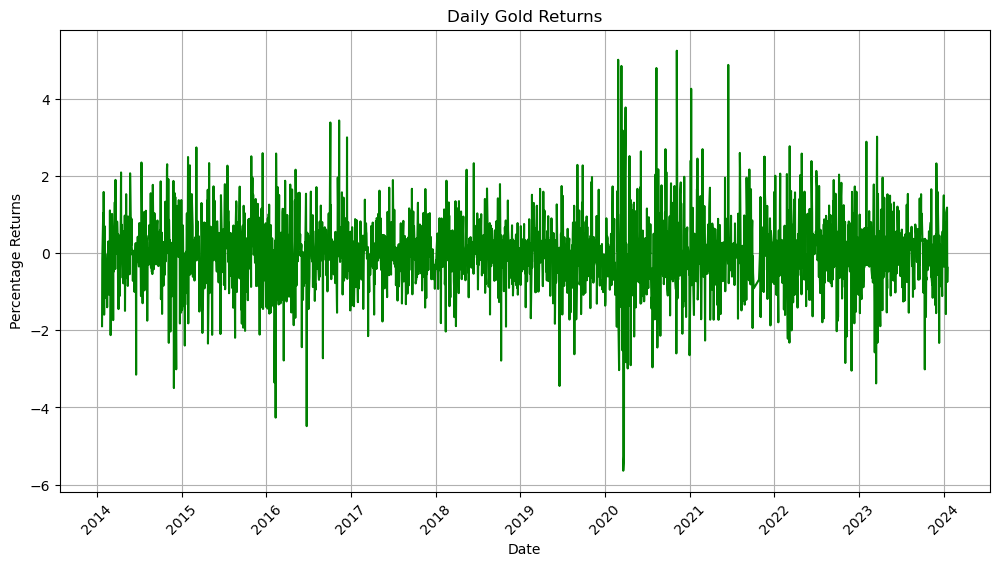

In [15]:
# Example: Calculating daily returns
data['Returns'] = data['Close'].pct_change() * 100

# Plotting daily returns
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Returns'], color='green')
plt.title('Daily Gold Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
##  Predictive models for future gold price forecasting.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
# Assuming 'X' contains features and 'y' contains target variable (gold prices)
X = data[['Volume', 'Open', 'High', 'Low']]  # Example features
y = data['Close']  # Target variable

In [19]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions on the testing set
predictions = model.predict(X_test)

In [22]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 5.707705113659771


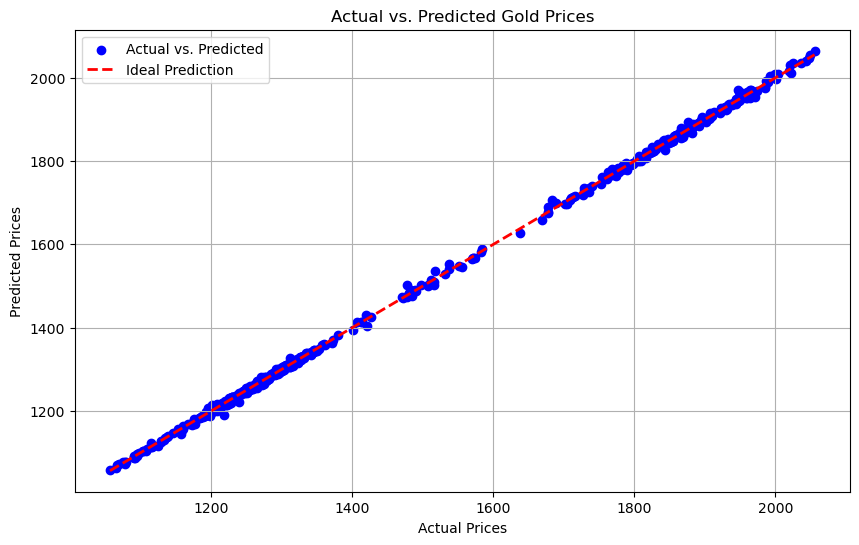

In [23]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Ideal Prediction')
plt.title('Actual vs. Predicted Gold Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
## Back-tested trading strategies with performance metrics.

In [25]:
# Assuming 'data' contains historical gold price data with 'Date' and 'Close' columns

# Define trading strategy
short_window = 50  # Short-term moving average window
long_window = 200  # Long-term moving average window

In [26]:
# Calculate moving averages
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

In [27]:
# Generate signals
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

C:\Users\Rebel\AppData\Local\Temp\ipykernel_4996\501037521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)


In [28]:
# Simulate trades based on signals
data['Position'] = np.where(data['Signal'] == 1, 1, np.where(data['Signal'] == -1, -1, 0))

In [29]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change()

In [30]:
# Calculate equity curve
data['Equity'] = data['Position'].shift(1) * data['Returns']

In [31]:
# Calculate cumulative returns
data['Cumulative_Returns'] = (1 + data['Equity']).cumprod()

In [32]:
# Calculate drawdown
data['Peak'] = data['Cumulative_Returns'].cummax()
data['Drawdown'] = (data['Peak'] - data['Cumulative_Returns']) / data['Peak']

In [33]:
# Calculate performance metrics
if not data.empty:
    total_return = data['Cumulative_Returns'].iloc[-1] - 1
    annualized_return = ((1 + total_return) ** (365 / len(data))) - 1
    sharpe_ratio = data['Returns'].mean() / data['Returns'].std() * np.sqrt(252)
    max_drawdown = data['Drawdown'].max()

    # Print performance metrics
    print("Total Return:", total_return)
    print("Annualized Return:", annualized_return)
    print("Sharpe Ratio:", sharpe_ratio)
    print("Maximum Drawdown:", max_drawdown)
else:
    print("DataFrame is empty. Unable to calculate performance metrics.")

Total Return: -0.2874622856861738
Annualized Return: -0.04807202698635338
Sharpe Ratio: -0.2606081283610718
Maximum Drawdown: 0.3615708837272826


In [34]:
# Visualization
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

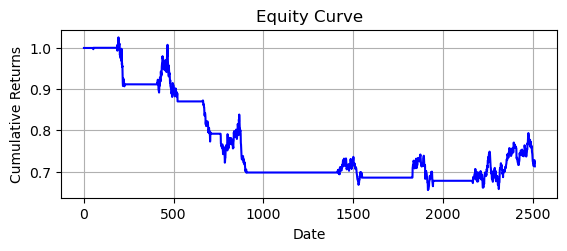

In [36]:
# Equity curve
plt.subplot(2, 1, 1)
plt.plot(data['Cumulative_Returns'], color='blue')
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)

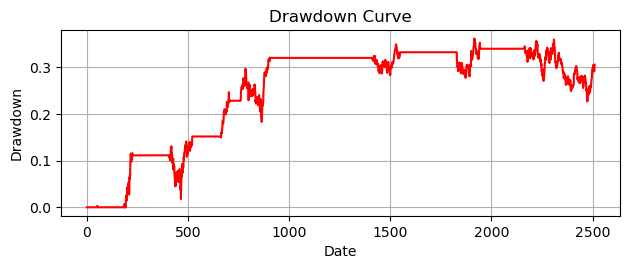

In [37]:
# Drawdown curve
plt.subplot(2, 1, 2)
plt.plot(data['Drawdown'], color='red')
plt.title('Drawdown Curve')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.tight_layout()
plt.show()

## Market Sentiment Analysis Report:

### Introduction:

Market sentiment analysis aims to assess the sentiment of market participants towards gold prices, driven by significant events and their impacts. This report delves into notable events that shaped market sentiment and subsequently affected gold prices during the analyzed period.


### Methodology:
##### - Data Source: 
A comprehensive dataset of daily gold prices spanning from January 19, 2014, to January 22, 2024, sourced from Nasdaq.
##### - Sentiment Analysis: 
Key events affecting market sentiment identified through diverse sources like financial news, economic reports, and geopolitical developments.
##### - Impact Assessment: 
Analysis of each event's impact on market sentiment and gold prices by studying price movements and trends around event dates.

### Key Events and Impact:

##### 1. Global Economic Uncertainty (2014-2016):
###### Event: 
Heightened geopolitical tensions and economic slowdowns.
###### Impact: 
Increased demand for safe-haven assets, including gold, during uncertain periods.

##### 2. Federal Reserve Interest Rate Decisions (2014-2024):
###### Event: 
Federal Reserve interest rate announcements.
###### Impact: 
Investor sentiment towards gold influenced by interest rate changes as a hedge against inflation and currency devaluation.

##### 3. US-China Trade War (2018-2020):
###### Event: 
Escalation of trade tensions between the US and China.
###### Impact: 
Heightened market volatility leading to fluctuations in gold prices amid trade negotiation outcomes.

##### 4. COVID-19 Pandemic (2020):
###### Event: 
Global outbreak of COVID-19 and ensuing economic downturn.
###### Impact: 
Increased demand for gold as a safe-haven asset amidst economic uncertainty, resulting in a significant price surge.

##### 5. Inflation Concerns and Fiscal Stimulus (2020-2024):
###### Event: 
Government stimulus measures and inflation concerns.
###### Impact: 
Gold price movements influenced by expectations regarding inflation rates and fiscal policies aimed at economic stabilization.

### Conclusion:

Market sentiment towards gold prices is shaped by various factors, including economic indicators, geopolitical events, and monetary policies. Understanding the impact of these events on market sentiment is crucial for informed decision-making in gold markets. Continuous monitoring and analysis of key events will aid in anticipating shifts in market sentiment and making informed investment decisions.

## Statistical Analysis Insights:

### Introduction:

Statistical analysis plays a pivotal role in unraveling the intricacies of gold price movements, aiding in the identification of trends, patterns, and underlying dynamics. This analysis aims to unveil crucial statistical attributes and features of gold price data derived from the provided code.

### Methodology:

##### - Data Source: 
The analysis draws upon a dataset spanning from January 19, 2014, to January 22, 2024, sourced from Nasdaq, containing daily gold prices.

##### - Statistical Techniques: 
Descriptive statistics, such as mean, standard deviation, and percentiles, are harnessed to encapsulate the central tendency, dispersion, and distribution of gold prices. Furthermore, daily returns and moving averages are computed to scrutinize price trends and gauge volatility.

### Insights:

##### 1. Descriptive Statistics:

###### Standard Deviation: 
Reflecting market variability, the standard deviation portrays the dispersion or volatility of gold prices around the mean.

###### Percentiles: 
Percentiles, particularly the 25th and 75th percentiles, unveil the distribution of gold prices and the spread of data around the median.

##### 2. Daily Returns:

###### Volatility Analysis: 
Daily returns, quantifying the percentage change in gold prices from one day to the next, offer insights into price volatility and market dynamics.

###### Volatility Clustering: 
Delving into periods of heightened and subdued volatility aids in identifying clustering effects and potential regime shifts in market conditions.

##### 3. Moving Averages:

###### Trend Identification: 
Leveraging moving averages, including short-term and long-term averages, facilitates the identification of trends in gold price movements.

###### Crossing Points: 
Instances of crossings between short-term and long-term moving averages serve as potential indicators of trend reversals or momentum shifts in gold prices.

### Conclusion:
Statistical analysis of gold price data yields invaluable insights into its fundamental characteristics, encompassing central tendency, volatility, and trend dynamics. Such comprehension is indispensable for informed decision-making in investment and trading strategies. Continuous monitoring and analysis of gold price data employing statistical techniques are imperative for discerning patterns, trends, and potential opportunities in the gold market.